<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">

# Aprendizaje por Refuerzos 1
# Trabajo práctico final

## Alumnos
- Denardi, Fabricio
- Donadello, Julio Agustín
- Isidro, Marco Joel	
- Masoller Gancedo, Bruno Martin

## Cohorte
MIA 01-2025

# Planteo del probema
Para este trabajo práctico decidimos entrenar un modelo de **QLearning** para resolver el problema del Taxi de Gymnasium:
https://gymnasium.farama.org/environments/toy_text/taxi/

## Customización
El valor agregado que nos planteamos es llevar este entorno de 5 * 5 casillas a 10 * 10. 

# Resolución
La resolución se compone de 3 partes:
1. Entrenamiento del modelo
2. Prueba del modelo
3. Conclusiones

El escenario elegido, que por cierto se puede editar desde la clase *taxi_env.py* es el siguiente: <br/>
PICKUP_LOCATIONS = [(0, 0), (3, 9), (9, 2), (7, 9)] <br/>
DROPOFF_LOCATIONS = [(5, 5), (5, 6), (6, 5), (6, 6)] <br/>
OBSTACLES = [(2,1),(3,1),(4,1),(5,1),(3, 3), (3, 4), (3, 5), (7, 6), (8, 6),(0,8),(1,8),(2,8),(3,8),(4,8)] <br/><br/>


Lo que se ven sos las coordenadas, al ser un entorno de 10 x 10, y base 0, tenemos coordenadas X e Y de 0 a 9. Se intentó darle cierta complejidad al escneario haciendo que algunas locaciones de pickup estén parcialmente ocultas por obstáculos, y que estas locaciones esten distribuidas irregularmente.

## Comentario para developers
en el repositorio verán una serie de .py. El orden a ejecutar es:
1. train.py
2. test.py
3. save_video.py

# Entrenamiento
Para el entrenamiento utilizamos el framework Optuna. Nuestra idea fue buscar la mejor combinación de los hiperparámetros elegidos:
- Alpha
- Gamma 
- Epsilon

In [3]:
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [4]:
# Cargar variables de entorno desde .env
base_path = os.path.join(os.getcwd(), "TP1-QLearning","taxi_env_qlearning")
results_path = os.path.join(base_path,"results")

best_result_path = os.path.join(results_path,"best_result")

In [5]:
csv_path = os.path.join(results_path, "trial_results.csv")
df_results = pd.read_csv(csv_path)

print(df_results)


    Trial     Alpha     Gamma   Epsilon  Recompensa promedio Mejor
0       0  0.123689  0.822038  0.277774               -23.53    No
1       1  0.356425  0.858658  0.141012                -1.54    No
2       2  0.765058  0.928551  0.719661              -186.40    No
3       3  0.292070  0.872176  0.813434              -358.22    No
4       4  0.385752  0.750833  0.482097               -65.06    No
5       5  0.204382  0.730888  0.462991               -60.88    No
6       6  0.513585  0.989384  0.944593              -723.61    No
7       7  0.159910  0.915289  0.188564                -9.29    No
8       8  0.282972  0.909467  0.677488              -162.79    No
9       9  0.137379  0.797294  0.243420               -28.98    No
10     10  0.807471  0.791976  0.104918                 6.04    No
11     11  0.989280  0.805786  0.118993                 2.43    No
12     12  0.959409  0.779534  0.349891               -26.57    No
13     13  0.638051  0.703830  0.125227                 2.09  

## Mejores parámetros
La mejor combinación de parámetros es la siguiente:

In [6]:
best_trials = df_results[df_results['Mejor'] == 'Yes']
print(best_trials)

    Trial    Alpha     Gamma   Epsilon  Recompensa promedio Mejor
46     46  0.87844  0.824422  0.100284                 6.66   Yes


## Visualización de gráficos y resultados
A continuación mostraremos una serie de gráficos que nos ayudarán a entender mejor y sacar conclusiones luegos

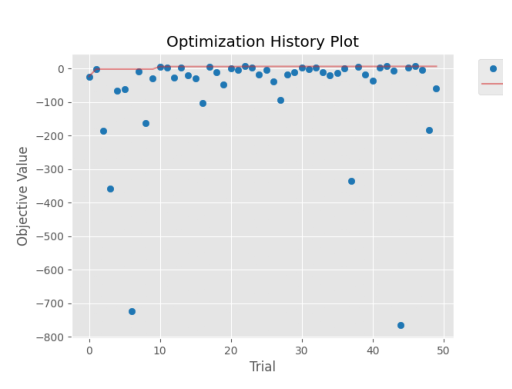

In [7]:

# Ruta de la imagen
image_path = os.path.join(results_path, "optimization_history.png")  

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Opcional: Ocultar los ejes
plt.show()

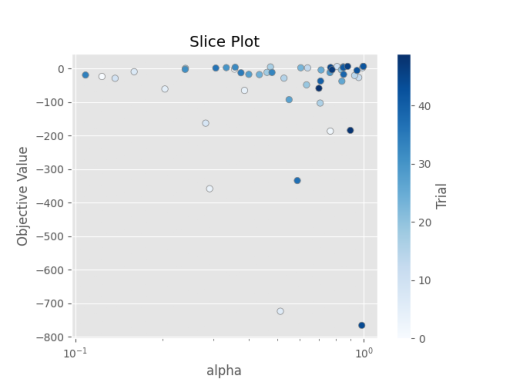

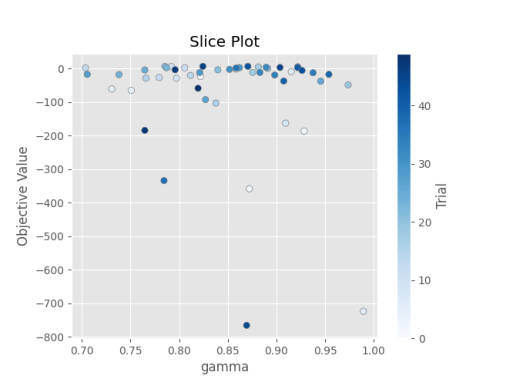

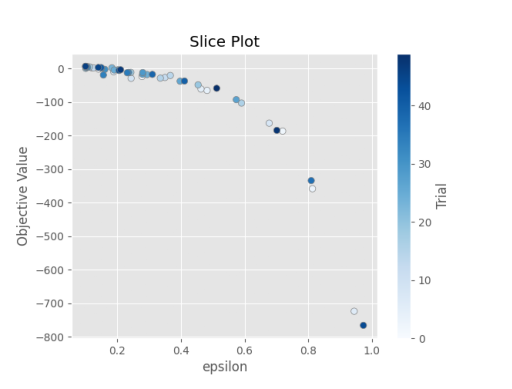

In [8]:

image_path = os.path.join(results_path, "slice_alpha.png")  

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Opcional: Ocultar los ejes
plt.show()


image_path = os.path.join(results_path, "slice_gamma.png")  

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Opcional: Ocultar los ejes
plt.show()


image_path = os.path.join(results_path, "slice_epsilon.png")  

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Opcional: Ocultar los ejes
plt.show()

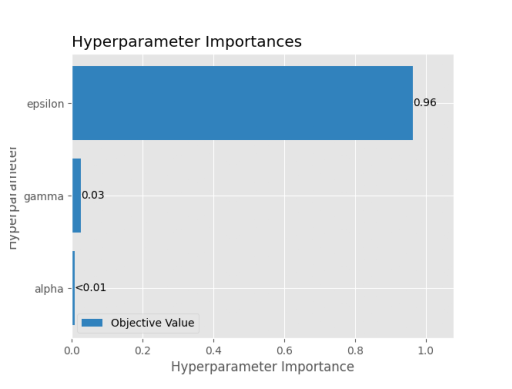

In [9]:
image_path = os.path.join(results_path, "param_importance.png")  

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Opcional: Ocultar los ejes
plt.show()

# Testeo
Luego de entrenar el modelo, realizamos una prueba del mismo. Vamos a mostrar el paso a paso de como el taxi recoge el pasajero y lo lleva al complejo de hoteles destino.

In [10]:
from IPython.display import Video

# Ruta del video
video_path = os.path.join(best_result_path, "step_by_step.mov")

# Mostrar el video
Video(video_path, embed=True)

Si no puede ver el video, aquí tiene una impresión de los frames.

Paso 1: step_00.png


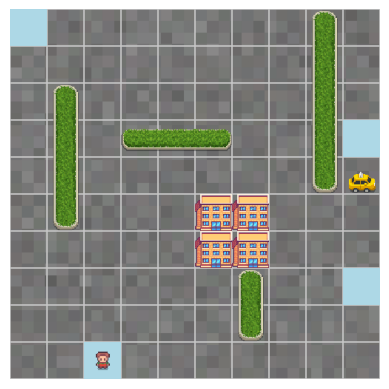

Paso 2: step_01.png


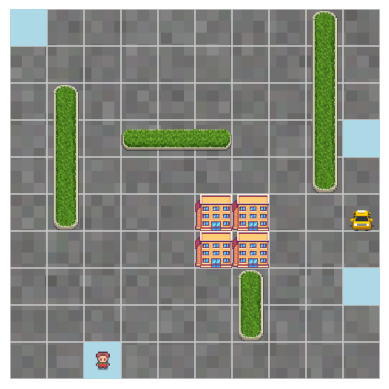

Paso 3: step_02.png


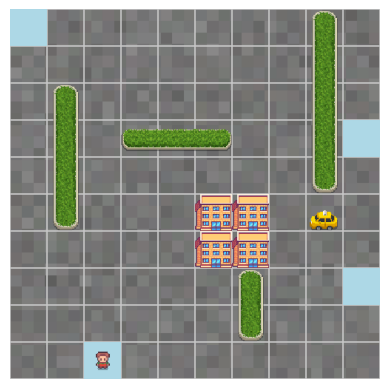

Paso 4: step_03.png


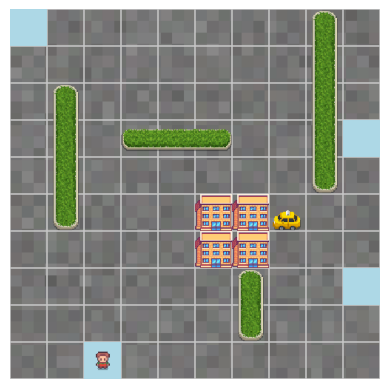

Paso 5: step_04.png


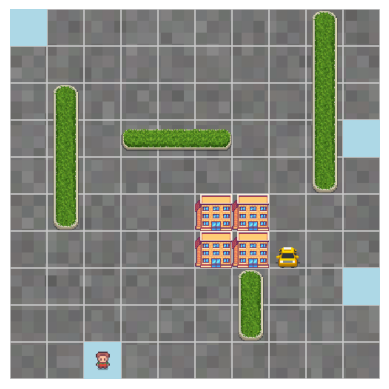

Paso 6: step_05.png


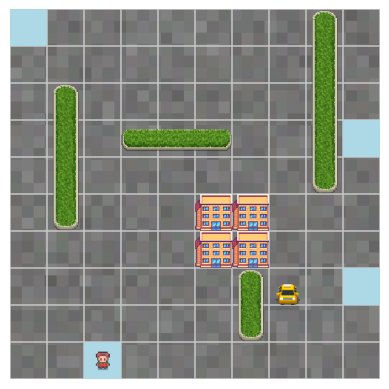

Paso 7: step_06.png


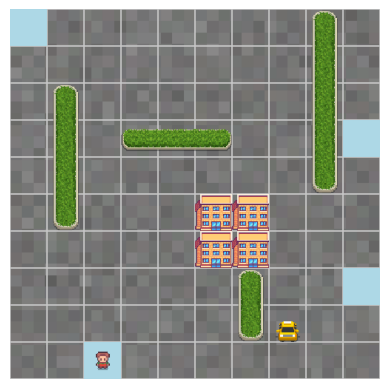

Paso 8: step_07.png


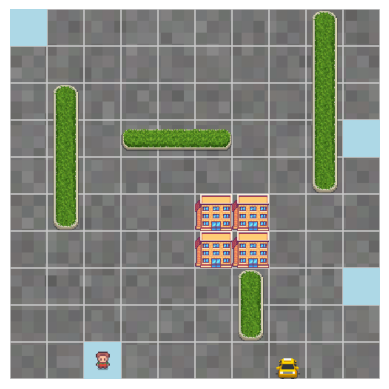

Paso 9: step_08.png


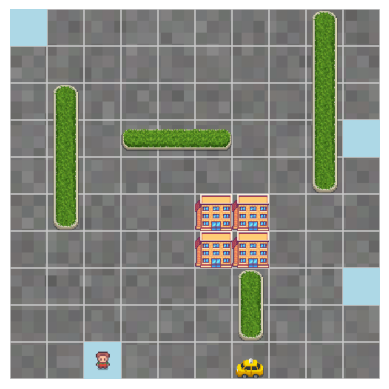

Paso 10: step_09.png


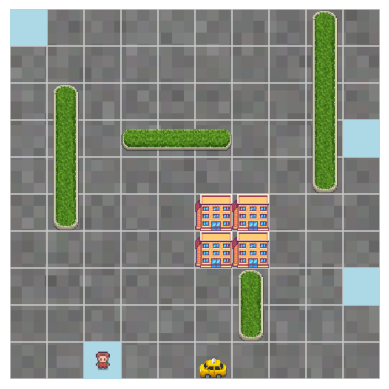

Paso 11: step_10.png


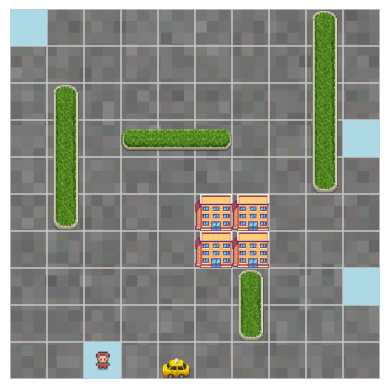

Paso 12: step_11.png


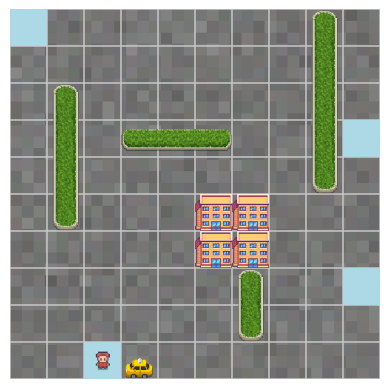

Paso 13: step_12.png


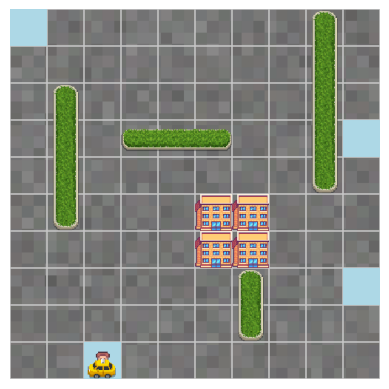

Paso 14: step_13.png


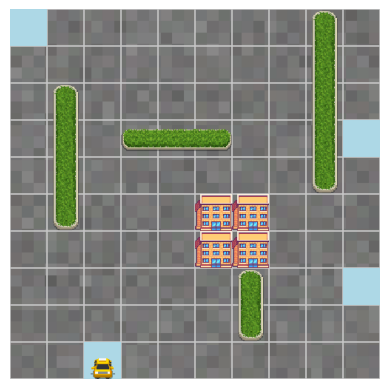

Paso 15: step_14.png


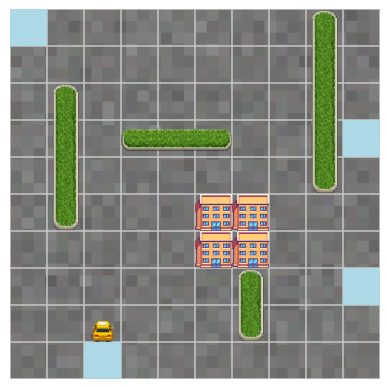

Paso 16: step_15.png


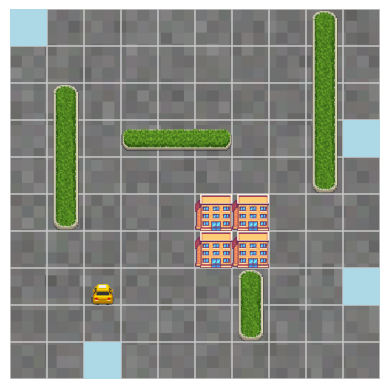

Paso 17: step_16.png


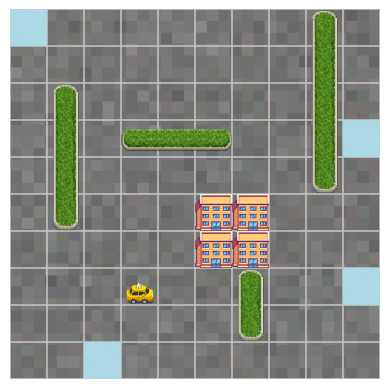

Paso 18: step_17.png


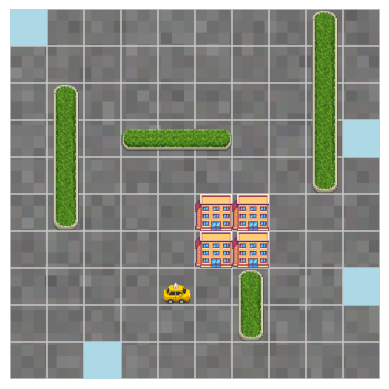

Paso 19: step_18.png


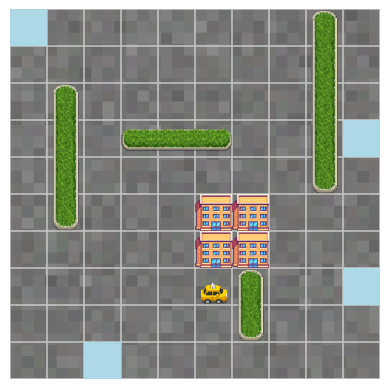

Paso 20: step_19.png


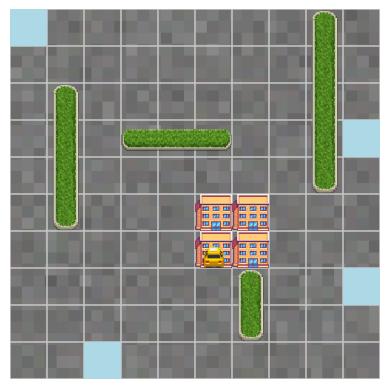

Paso 21: step_20.png


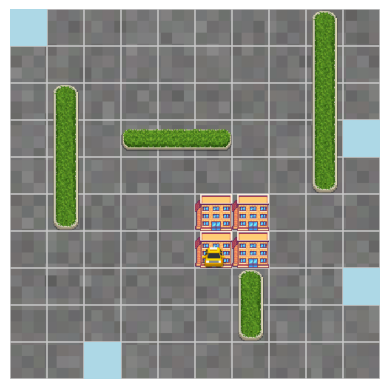

In [11]:
# Recorrer la carpeta y listar los archivos
images_path = os.path.join(best_result_path,"img")
for i, filename in enumerate(sorted(filter(lambda f: f.endswith('.png'), os.listdir(images_path))), start=1):
    print(f"Paso {i}: {filename}")

    image_path = os.path.join(images_path, filename)  

    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Opcional: Ocultar los ejes
    plt.show()

# Conclusiones
1. Gamma ≈ 0.987 es muy alto, lo cual es bueno: el agente valora fuertemente las recompensas futuras, lo que puede llevar a trayectorias más eficientes y estrategias más “inteligentes”.

2. Alpha ≈ 0.21 implica un aprendizaje moderadamente lento y estable. Esto ayuda a evitar que el agente sobreajuste a experiencias ruidosas, pero puede requerir más episodios para converger.

3. Epsilon ≈ 0.10 indica que el agente aún explora un 10% del tiempo, lo cual está en un buen punto medio para explotación y exploración, especialmente si estamos en las últimas etapas del entrenamiento.

4. El bajo alpha puede haber permitido que el agente converja con más precisión, incluso si el promedio de recompensa es más bajo.

5. El agente probablemente está realizando trayectorias más largas pero más seguras, por el alto gamma y bajo epsilon, lo que puede llevar a soluciones más consistentes.

6. La combinación bajo alpha + alto gamma sugiere un agente paciente y cuidadoso, que aprende lentamente pero construye una política más sólida.